Con este programa generamos un dataframe con datos de imagenes

In [1]:
import os

home = os.path.expanduser("~")

db_name=  'colab_main_dataset_21' #'test_new_creators_4'
#input_dir = os.path.join(home, 'video_resources', 'image_datasets')
output_dir = os.path.join(home, 'video_resources', 'sql_database')
#output_dir = os.path.join(home, 'drive', '.shared','LR_face_video')
#database_names=['enfsi','lfw','forenface'] # 'lfw', 'scface',  'enfsi', 'enfsi2015', 'xqlfw', 'utkface','chokepoint','forenface'
#detector_names=['mtcnn'] # 'dlib', 'mtcnn', 'mtcnn_serfiq'
#embedding_model_names=["QMagFace"] # , "Dlib", "ArcFace",
#attributes_to_update=[]  # 'gender', 'age', 'emotion', 'race'
#quality_model_names = ['ser_fiq', 'tface'] # 'confusion_score', 'ser_fiq',

In [2]:
from sql_face.alchemy import get_session
session = get_session(output_dir, db_name)



2023-05-27 16:39:33.214035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sql_face.tables import  QualityImage, FaceImage, CroppedImage, Image, QualityModel, QualityGroup,Detector, EmbeddingModel,EnfsiImage,EnfsiVideoFrame

In [4]:

results = session.query(Image,Detector.name,EmbeddingModel.name,QualityModel.name,QualityImage.quality_group,QualityImage.quality) \
                        .select_from(Image) \
                        .join(CroppedImage).join(Detector).filter(CroppedImage.face_detected == True) \
                        .join(FaceImage).join(EmbeddingModel) \
                        .join(QualityImage).join(QualityModel) \
                        .filter(QualityImage.quality != None) \
                        .all() 
#.filter(EnfsiVideoFrame.yaw !=None)
#

In [5]:
im_cols = ['identity', 'pitch', 'angle_pitch', 'yaw', 'angle_yaw', 'roll','angle_roll',
           'source', 'gender', 'headgear',  'age','age_number',
            'glasses', 'type',  'beard', 'emotion', 'other_occlusions',
            'race',  'image_id']

df = pd.DataFrame([ [getattr(r[0],attr)   for attr in im_cols]  + list(r[1:6])
                   for r in results],
                   columns=im_cols + ['Detector','E_Model','Q_model','Q_group','Quality']  )

df.to_pickle(os.path.join(output_dir,'df_all_colab_21.pkl'))

<AxesSubplot: >

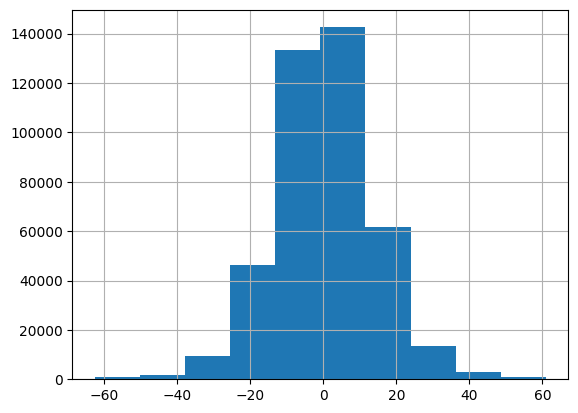

In [6]:
df.angle_yaw.hist()

In [7]:
df.source.value_counts()

UTKface       706684
LFW           396830
XQLFW         374130
SCFace        118540
ChokePoint     71559
ForenFace      69118
ENFSI          54560
Name: source, dtype: int64

In [8]:
len(results)

1791421

In [9]:
df

,identity,pitch,angle_pitch,yaw,angle_yaw,roll,angle_roll,source,gender,headgear,...,beard,emotion,other_occlusions,race,image_id,Detector,E_Model,Q_model,Q_group,Quality
0,2011-1-unknown,Pitch.FRONTAL,-1.539315,Yaw.FRONTAL,-2.064884,Roll.FRONTAL,1.668600,ENFSI,Gender.MALE,False,...,False,Emotion.NEUTRAL,False,Race.WHITE,1,mtcnn,ArcFace,ser_fiq,QualityGroup.HIGH,0.632035
1,2011-1,Pitch.FRONTAL,8.485744,Yaw.FRONTAL,7.485447,Roll.FRONTAL,0.792988,ENFSI,Gender.MALE,False,...,False,Emotion.FEAR,False,Race.LATINO,2,mtcnn,ArcFace,ser_fiq,QualityGroup.VERY_HIGH,0.771966
2,2011-2-unknown,Pitch.FRONTAL,-3.920415,Yaw.FRONTAL,1.548413,Roll.FRONTAL,-0.274244,ENFSI,Gender.MALE,False,...,True,Emotion.NEUTRAL,False,Race.WHITE,3,mtcnn,ArcFace,ser_fiq,QualityGroup.MEDIUM,0.491990
3,2011-2,Pitch.FRONTAL,-8.626112,Yaw.FRONTAL,7.159441,Roll.HALF_LEANING,-7.312764,ENFSI,Gender.MALE,False,...,False,Emotion.SAD,False,Race.ASIAN,4,mtcnn,ArcFace,ser_fiq,QualityGroup.HIGH,0.702496
4,2011-3,Pitch.FRONTAL,9.193484,Yaw.FRONTAL,8.528775,Roll.FRONTAL,2.590432,ENFSI,Gender.MALE,False,...,False,Emotion.SAD,False,Race.WHITE,5,mtcnn,ArcFace,ser_fiq,QualityGroup.LOW,0.053961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791416,0001,None,NaN,None,NaN,None,NaN,ChokePoint,Gender.MALE,None,...,None,Emotion.NEUTRAL,None,Race.ASIAN,133930,mtcnn_serfiq,QMagFace,ser_fiq,QualityGroup.HIGH,0.670448
1791417,0001,None,NaN,None,NaN,None,NaN,ChokePoint,Gender.MALE,None,...,None,Emotion.NEUTRAL,None,Race.ASIAN,133931,mtcnn_serfiq,QMagFace,ser_fiq,QualityGroup.HIGH,0.623821
1791418,0001,None,NaN,None,NaN,None,NaN,ChokePoint,Gender.MALE,None,...,None,Emotion.SAD,None,Race.ASIAN,133932,mtcnn_serfiq,QMagFace,ser_fiq,QualityGroup.HIGH,0.643205
1791419,0001,None,NaN,None,NaN,None,NaN,ChokePoint,Gender.MALE,None,...,None,Emotion.NEUTRAL,None,Race.ASIAN,133933,mtcnn_serfiq,QMagFace,ser_fiq,QualityGroup.MEDIUM,0.555661
